In [1]:
import librosa
from librosa import feature
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
#import graphviz 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import os
import sys
import time
from functools import reduce
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn import linear_model, tree, ensemble

## Valve merging of 6,0,-6

In [2]:
def merge_pd(machine):
    df_6dB=pd.read_csv(f'/home/regis/Desktop/machines/Codit-project/Librosa_features_{machine}_6dB.csv')
    df_0dB=pd.read_csv(f'/home/regis/Desktop/machines/Codit-project/Librosa_features_{machine}_0dB.csv')
    df_min6dB=pd.read_csv(f'/home/regis/Desktop/machines/Codit-project/Librosa_features_{machine}_-6dB.csv')
    df_6dB.drop(columns = ['Unnamed: 0'], axis=1, inplace=True)
    df_0dB.drop(columns = ['Unnamed: 0'], axis=1, inplace=True)
    df_min6dB.drop(columns = ['Unnamed: 0'], axis=1, inplace=True)

    df_6dB.columns = [str(col) + '_6dB' for col in df_6dB.columns]
    df_0dB.columns = [str(col) + '_0dB' for col in df_0dB.columns]
    df_min6dB.columns = [str(col) + '_-6dB' for col in df_min6dB.columns]
    data_frames = [df_6dB, df_0dB, df_min6dB]
    df_merged = reduce(lambda  left,right: pd.merge(left,right,left_index=True, right_index=True,how='outer'), data_frames)
    return df_merged

In [3]:
valve=merge_pd('fan')

In [21]:
valve.shape

(5550, 61)

In [4]:
valve.columns

Index(['melspectrogram_6dB', 'melspectrogram_min_6dB',
       'melspectrogram_max_6dB', 'melspectrogram_sum_6dB',
       'melspectrogram_corr_6dB', 'melspectrogram_std_6dB', 'mfcc_6dB',
       'rms_6dB', 'spectral_centroid_6dB', 'spectral_bandwidth_6dB',
       'spectral_contrast_6dB', 'spectral_flatness _6dB',
       'spectral_rolloff_6dB', 'zero_crossing_rate_6dB', 'mean harm_6dB',
       'mean perc_6dB', 'max harm_6dB', 'max perc_6dB', 'min harm_6dB',
       'min perc_6dB', 'normal(0)/abnormal(1)_6dB', 'melspectrogram_0dB',
       'melspectrogram_min_0dB', 'melspectrogram_max_0dB',
       'melspectrogram_sum_0dB', 'melspectrogram_corr_0dB',
       'melspectrogram_std_0dB', 'mfcc_0dB', 'rms_0dB',
       'spectral_centroid_0dB', 'spectral_bandwidth_0dB',
       'spectral_contrast_0dB', 'spectral_flatness _0dB',
       'spectral_rolloff_0dB', 'zero_crossing_rate_0dB', 'mean harm_0dB',
       'mean perc_0dB', 'max harm_0dB', 'max perc_0dB', 'min harm_0dB',
       'min perc_0dB', 'normal

In [5]:
valve.drop(columns=['normal(0)/abnormal(1)_6dB','normal(0)/abnormal(1)_0dB'],axis=1,inplace=True)

In [6]:
valve.head()

,melspectrogram_6dB,melspectrogram_min_6dB,melspectrogram_max_6dB,melspectrogram_sum_6dB,melspectrogram_corr_6dB,melspectrogram_std_6dB,mfcc_6dB,rms_6dB,spectral_centroid_6dB,spectral_bandwidth_6dB,...,spectral_flatness _-6dB,spectral_rolloff_-6dB,zero_crossing_rate_-6dB,mean harm_-6dB,mean perc_-6dB,max harm_-6dB,max perc_-6dB,min harm_-6dB,min perc_-6dB,normal(0)/abnormal(1)_-6dB
0,0.008870,1.207413e-09,0.217286,489.342621,0.036707,0.015815,-12.846735,0.004381,1178.821555,1561.366942,...,0.000128,2032.814313,0.041871,7.015354e-07,-5.880125e-07,0.030565,0.017350,-0.028219,-0.018909,0
1,0.008814,1.201971e-09,0.185242,486.255402,0.031088,0.015326,-12.400963,0.004300,1121.206650,1476.771313,...,0.000306,3174.149020,0.068203,-8.513377e-07,-1.200635e-08,0.030325,0.012385,-0.031419,-0.011299,0
2,0.009081,1.190875e-09,0.243309,500.994965,0.056441,0.016951,-11.675858,0.004623,1075.123813,1412.927905,...,0.000169,2457.433091,0.049392,-1.888008e-06,-1.850616e-06,0.027346,0.021098,-0.025741,-0.018760,0
3,0.008999,1.170776e-09,0.184777,496.479675,0.031641,0.015704,-12.594336,0.004298,1208.611399,1627.753890,...,0.000320,3398.074348,0.074555,-7.017891e-07,-1.468647e-06,0.030402,0.011645,-0.029092,-0.013221,0
4,0.008867,1.094482e-09,0.211936,489.166473,0.071156,0.016454,-11.836786,0.004419,1009.561703,1369.566582,...,0.000116,2204.255581,0.036080,3.498635e-06,2.163719e-06,0.030506,0.024835,-0.033787,-0.024464,0


In [7]:
valve.rename(columns={'normal(0)/abnormal(1)_-6dB': 'normal(0)/abnormal(1)'}, inplace=True)

In [8]:
valve.columns

Index(['melspectrogram_6dB', 'melspectrogram_min_6dB',
       'melspectrogram_max_6dB', 'melspectrogram_sum_6dB',
       'melspectrogram_corr_6dB', 'melspectrogram_std_6dB', 'mfcc_6dB',
       'rms_6dB', 'spectral_centroid_6dB', 'spectral_bandwidth_6dB',
       'spectral_contrast_6dB', 'spectral_flatness _6dB',
       'spectral_rolloff_6dB', 'zero_crossing_rate_6dB', 'mean harm_6dB',
       'mean perc_6dB', 'max harm_6dB', 'max perc_6dB', 'min harm_6dB',
       'min perc_6dB', 'melspectrogram_0dB', 'melspectrogram_min_0dB',
       'melspectrogram_max_0dB', 'melspectrogram_sum_0dB',
       'melspectrogram_corr_0dB', 'melspectrogram_std_0dB', 'mfcc_0dB',
       'rms_0dB', 'spectral_centroid_0dB', 'spectral_bandwidth_0dB',
       'spectral_contrast_0dB', 'spectral_flatness _0dB',
       'spectral_rolloff_0dB', 'zero_crossing_rate_0dB', 'mean harm_0dB',
       'mean perc_0dB', 'max harm_0dB', 'max perc_0dB', 'min harm_0dB',
       'min perc_0dB', 'melspectrogram_-6dB', 'melspectrogram_min_

In [9]:
y=valve['normal(0)/abnormal(1)'].values
X=valve.drop(columns=['normal(0)/abnormal(1)'], axis=1)

In [10]:
#Choosing 80% as training data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [22]:
valve.isnull().sum()

melspectrogram_6dB         5545
melspectrogram_min_6dB     5545
melspectrogram_max_6dB     5545
melspectrogram_sum_6dB     5545
melspectrogram_corr_6dB    5545
                           ... 
max harm_-6dB                 0
max perc_-6dB                 0
min harm_-6dB                 0
min perc_-6dB                 0
normal(0)/abnormal(1)         0
Length: 61, dtype: int64

In [18]:
nan=list(valve.isnull().sum())

In [19]:
nan

[5545,
 5545,
 5545,
 5545,
 5545,
 5545,
 5545,
 5545,
 5545,
 5545,
 5545,
 5545,
 5545,
 5545,
 5545,
 5545,
 5545,
 5545,
 5545,
 5545,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [11]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100, random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [12]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print('confusion matrix')
print(confusion_matrix(y_test, y_pred))
print('classification report')
print(classification_report(y_test, y_pred))
print('accuracy score')
print(accuracy_score(y_test, y_pred))

confusion matrix


NameError: name 'y_pred' is not defined

In [13]:
x_columns=list(X.columns)

In [14]:
# get importance
unimportant_columns =[]

importance = classifier.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print(f'Feature: %0d,\t Name: {x_columns[i]}, \t Score: %.5f' % (i,v*100))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

## Random Forest with removal of features

In [15]:
X.columns

Index(['melspectrogram_6dB', 'melspectrogram_min_6dB',
       'melspectrogram_max_6dB', 'melspectrogram_sum_6dB',
       'melspectrogram_corr_6dB', 'melspectrogram_std_6dB', 'mfcc_6dB',
       'rms_6dB', 'spectral_centroid_6dB', 'spectral_bandwidth_6dB',
       'spectral_contrast_6dB', 'spectral_flatness _6dB',
       'spectral_rolloff_6dB', 'zero_crossing_rate_6dB', 'mean harm_6dB',
       'mean perc_6dB', 'max harm_6dB', 'max perc_6dB', 'min harm_6dB',
       'min perc_6dB', 'melspectrogram_0dB', 'melspectrogram_min_0dB',
       'melspectrogram_max_0dB', 'melspectrogram_sum_0dB',
       'melspectrogram_corr_0dB', 'melspectrogram_std_0dB', 'mfcc_0dB',
       'rms_0dB', 'spectral_centroid_0dB', 'spectral_bandwidth_0dB',
       'spectral_contrast_0dB', 'spectral_flatness _0dB',
       'spectral_rolloff_0dB', 'zero_crossing_rate_0dB', 'mean harm_0dB',
       'mean perc_0dB', 'max harm_0dB', 'max perc_0dB', 'min harm_0dB',
       'min perc_0dB', 'melspectrogram_-6dB', 'melspectrogram_min_

Feature: 2,	 Name: melspectrogram_max_6dB, 	 Score: 4.97833
Feature: 4,	 Name: melspectrogram_corr_6dB, 	 Score: 4.55280
Feature: 5,	 Name: melspectrogram_std_6dB, 	 Score: 2.18550
Feature: 7,	 Name: rms_6dB, 	 Score: 2.06653
Feature: 17,	 Name: max perc_6dB, 	 Score: 12.66975
Feature: 19,	 Name: min perc_6dB, 	 Score: 6.14789
Feature: 24,	 Name: melspectrogram_corr_0dB, 	 Score: 3.73448
Feature: 37,	 Name: max perc_0dB, 	 Score: 10.73631
Feature: 39,	 Name: min perc_0dB, 	 Score: 6.31211
Feature: 44,	 Name: melspectrogram_corr_-6dB, 	 Score: 3.14127
Feature: 57,	 Name: max perc_-6dB, 	 Score: 6.61771
Feature: 59,	 Name: min perc_-6dB, 	 Score: 4.57862


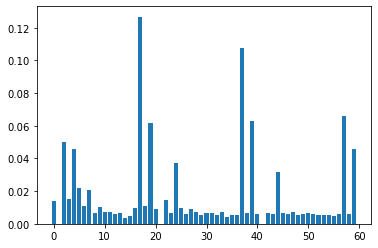

In [17]:
# get importance
unimportant_columns =[]

importance = classifier.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    if v*100 > 2:
        print(f'Feature: %0d,\t Name: {x_columns[i]}, \t Score: %.5f' % (i,v*100))
    else:
        unimportant_columns.append(x_columns[i])
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()
y=valve['normal(0)/abnormal(1)'].values
x=valve.drop(columns=unimportant_columns, axis=1)

In [18]:
x.columns

Index(['melspectrogram_max_6dB', 'melspectrogram_corr_6dB',
       'melspectrogram_std_6dB', 'rms_6dB', 'max perc_6dB', 'min perc_6dB',
       'melspectrogram_corr_0dB', 'max perc_0dB', 'min perc_0dB',
       'melspectrogram_corr_-6dB', 'max perc_-6dB', 'min perc_-6dB',
       'normal(0)/abnormal(1)'],
      dtype='object')

In [19]:
#Choosing 80% as training data.
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [20]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100, random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [21]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print('confusion matrix')
print(confusion_matrix(y_test, y_pred))
print('classification report')
print(classification_report(y_test, y_pred))
print('accuracy score')
print(accuracy_score(y_test, y_pred))

confusion matrix
[[745   0]
 [  0  89]]
classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       745
           1       1.00      1.00      1.00        89

    accuracy                           1.00       834
   macro avg       1.00      1.00      1.00       834
weighted avg       1.00      1.00      1.00       834

accuracy score
1.0
